# DBSCAN with Scikit-learn

## Set up and generate data

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn import cluster, datasets, mixture

import time
import warnings
import queue
import numpy as np
import pandas as pd

from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

from sklearn import datasets
from fastcluster import linkage
from sklearn.neighbors import kneighbors_graph
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler



import numpy as np
import pandas as pd


from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from random import sample

from itertools import cycle, islice

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1000
n_components = 2 # the number of clusters


# X1, y1 = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
# X2, y2 = datasets.make_moons(n_samples=n_samples, noise=0.05)
X3, y3 = datasets.make_blobs(n_samples=n_samples, random_state=1)
# X4, y4 = np.random.rand(n_samples, 2), None


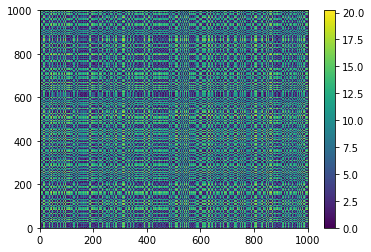

In [3]:
dist_mat = squareform(pdist(X3))

N = len(X3)
plt.pcolormesh(dist_mat)

plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

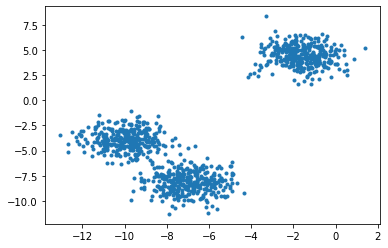

In [4]:
plt.scatter(X3[:,0], X3[:,1], alpha=1, marker='.')

# Create Clusters

Now we want to use K-Means clustering to create the clusters. 

In [5]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

labels = km.fit_predict(X3)
labels

array([0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0,
       0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0,
       1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2,
       0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0,
       0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1,

In [6]:
# Sort the data points based on their cluster memberships
# Here we have just 3 clusters. I do it simple by filtering the data points for each cluster and concatenating them 
sorted_X = np.concatenate((X3[labels==0], X3[labels==1], X3[labels==2]), axis=0)

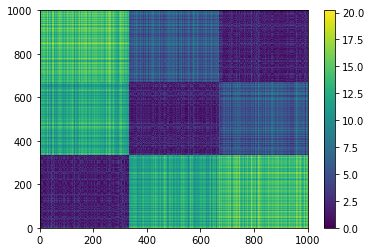

In [7]:
# Now let us create again the distance matrix similarty plot 

dist_mat = squareform(pdist(sorted_X))

N = len(sorted_X)
plt.pcolormesh(dist_mat)

plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

# Silhouetter Score

* silhouette_score (sklearn.metrics) for the data set is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.

* silhouette_samples (sklearn.metrics) provides the Silhouette scores for each sample of different clusters.

In [8]:
from sklearn import metrics
score = metrics.silhouette_score(X3, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.720


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(init='random', n_clusters=3,
                                      random_state=0))

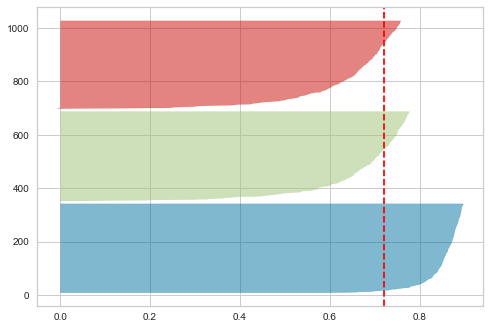

In [9]:
# Install module yellowbrick
# pip3 install yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X3)